In this project we are going to do Unsupervised Sentiment Analysis of Walmart Reviews Data. We will first preprocess the data, check for misspelled words, unrelevant words and stop words and will remove them. Further, we will lemmetise the text (transform the word to its root word). Next, we will perform sentimental analysis and try to explore the data based on sentiments and location etc attributes and plot the insights.

# Loading Data from Google Drive

In [1]:
from google.colab import drive #loading data from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os
import pandas as pd


Lets check, which files are available in our directory.

In [3]:

os.chdir("/content/drive/MyDrive/datasets/")
!ls

 AirQuality.csv   bearings.gsheet      full_data.gsheet		   myfile.csv	   tracks.csv
 answer.csv	  dataset.csv.gsheet  'Healthcare Providers.csv'   myfile.gsheet


Reading data into dataframe

In [4]:
path='/content/drive/MyDrive/datasets/myfile.csv'
data=pd.read_csv('/content/drive/MyDrive/datasets/myfile.csv') #reading dataset
data.head()

,name,location,Date,Rating,Review,Image_Links
0,A.,"Ankeny, IA","Reviewed Sept. 13, 2023",1,The customer service is very bad. I bought a B...,['No Images']
1,DONNA,"Phoenix, AZ","Reviewed Sept. 2, 2023",1,I have attempted to put this review on Walmart...,['https://media.consumeraffairs.com/files/cach...
2,Jill,"Baton Rouge, LA","Reviewed Aug. 28, 2023",1,I have been a Walmart plus member for years no...,['https://media.consumeraffairs.com/files/cach...
3,Sukanya,"Maumee, OH","Reviewed Aug. 25, 2023",1,I refused a living room set that they sent one...,['No Images']
4,Tiffany,"Laurinburg, NC","Reviewed Aug. 18, 2023",1,Beware!! Practices discriminatory/preferential...,['No Images']


Removing unrelevant column. (the image column can be useful for the analysis, but to keep the project simple and only based on text, lets not include image column).

In [5]:
df = data.drop('Image_Links', axis=1)
df.head()

,name,location,Date,Rating,Review
0,A.,"Ankeny, IA","Reviewed Sept. 13, 2023",1,The customer service is very bad. I bought a B...
1,DONNA,"Phoenix, AZ","Reviewed Sept. 2, 2023",1,I have attempted to put this review on Walmart...
2,Jill,"Baton Rouge, LA","Reviewed Aug. 28, 2023",1,I have been a Walmart plus member for years no...
3,Sukanya,"Maumee, OH","Reviewed Aug. 25, 2023",1,I refused a living room set that they sent one...
4,Tiffany,"Laurinburg, NC","Reviewed Aug. 18, 2023",1,Beware!! Practices discriminatory/preferential...


Data Preprocessing:

In [19]:
pip install pyspellchecker

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Performing tokenisation, Removing stopwords, special characters, misspelled words (correct them if found).

In [8]:

from textblob import TextBlob
from nltk.corpus import stopwords
from textblob import Word
import re

# Preprocessing

def clean_text(text):
    # Remove special characters and symbols
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    # Remove extra whitespaces
    text = ' '.join(text.split())
    # Convert to lowercase
    text = text.lower()
    return text

df['Review'] = [clean_text(text) for text in df['Review']]

from spellchecker import SpellChecker
spell = SpellChecker()
misspelled = spell.unknown(df['Review'])

# Check if there are misspelled words
if misspelled:
    corrected_text = []
    for text in df['Review']:
        blob = TextBlob(text)
        corrected_text.append(blob.correct())

    # Update the 'Review' column with corrected text
    df['Review'] = corrected_text
else:
    print("No misspelled words found, skipping correction")

# Display the DataFrame
print(df)



No misspelled words found, skipping correction
        name             location                     Date  Rating  \
0         A.           Ankeny, IA  Reviewed Sept. 13, 2023       1   
1      DONNA          Phoenix, AZ   Reviewed Sept. 2, 2023       1   
2       Jill      Baton Rouge, LA   Reviewed Aug. 28, 2023       1   
3    Sukanya           Maumee, OH   Reviewed Aug. 25, 2023       1   
4    Tiffany       Laurinburg, NC   Reviewed Aug. 18, 2023       1   
..       ...                  ...                      ...     ...   
295  Melissa       Texas City, TX   Reviewed Aug. 15, 2023       1   
296    David  West Palm Beach, FL    Reviewed Aug. 8, 2023       1   
297      Jay         Torrance, CA   Reviewed July 29, 2023       1   
298  Theresa          Chester, PA   Reviewed July 27, 2023       1   
299    Jenna       Waterville, OH   Reviewed July 21, 2023       1   

                                                Review  
0    the customer service is very bad i bought a br... 

In [9]:
pip install nltk scikit-learn

Removing stopwords and lemmetising the words to their root form. running to 'run'.

In [10]:
# Remove stopwords

from nltk.stem import WordNetLemmatizer
# Download NLTK data and initialize lemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords_and_lemmatize(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return " ".join(lemmatized_words)

# Remove stopwords and lemmatize in the 'Review' column
df['Review'] = df['Review'].apply(remove_stopwords_and_lemmatize)

# Display the DataFrame
print(df)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        name             location                     Date  Rating  \
0         A.           Ankeny, IA  Reviewed Sept. 13, 2023       1   
1      DONNA          Phoenix, AZ   Reviewed Sept. 2, 2023       1   
2       Jill      Baton Rouge, LA   Reviewed Aug. 28, 2023       1   
3    Sukanya           Maumee, OH   Reviewed Aug. 25, 2023       1   
4    Tiffany       Laurinburg, NC   Reviewed Aug. 18, 2023       1   
..       ...                  ...                      ...     ...   
295  Melissa       Texas City, TX   Reviewed Aug. 15, 2023       1   
296    David  West Palm Beach, FL    Reviewed Aug. 8, 2023       1   
297      Jay         Torrance, CA   Reviewed July 29, 2023       1   
298  Theresa          Chester, PA   Reviewed July 27, 2023       1   
299    Jenna       Waterville, OH   Reviewed July 21, 2023       1   

                                                Review  
0    customer service bad bought breville barista p...  
1    attempted put review walmart com indicat

Performing Unsupervised Sentiment Analysis:

In [11]:
from textblob import TextBlob

# Function to perform sentiment analysis and return sentiment labels
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment labels based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review in the 'Review' column
df['Sentiment'] = [analyze_sentiment(text) for text in df['Review']]

# Display the DataFrame with sentiment labels
print(df)


        name             location                     Date  Rating  \
0         A.           Ankeny, IA  Reviewed Sept. 13, 2023       1   
1      DONNA          Phoenix, AZ   Reviewed Sept. 2, 2023       1   
2       Jill      Baton Rouge, LA   Reviewed Aug. 28, 2023       1   
3    Sukanya           Maumee, OH   Reviewed Aug. 25, 2023       1   
4    Tiffany       Laurinburg, NC   Reviewed Aug. 18, 2023       1   
..       ...                  ...                      ...     ...   
295  Melissa       Texas City, TX   Reviewed Aug. 15, 2023       1   
296    David  West Palm Beach, FL    Reviewed Aug. 8, 2023       1   
297      Jay         Torrance, CA   Reviewed July 29, 2023       1   
298  Theresa          Chester, PA   Reviewed July 27, 2023       1   
299    Jenna       Waterville, OH   Reviewed July 21, 2023       1   

                                                Review Sentiment  
0    customer service bad bought breville barista p...  Negative  
1    attempted put review

Lets check numbers of positive and negative reviews per location.

In [12]:


# Assuming 'df' is your DataFrame with 'Location' and 'Sentiment' columns

# Group by location and sentiment, then count the occurrences
location_sentiment_counts = df.groupby(['location', 'Sentiment']).size().unstack(fill_value=0)

# Calculate the total positive and total negative per location
location_sentiment_counts['Total Positive'] = location_sentiment_counts['Positive']
location_sentiment_counts['Total Negative'] = location_sentiment_counts['Negative']

# Optionally, you can drop the 'Positive' and 'Negative' columns if you only want 'Total Positive' and 'Total Negative'
location_sentiment_counts = location_sentiment_counts[['Total Positive', 'Total Negative']]

print(location_sentiment_counts)


Sentiment            Total Positive  Total Negative
location                                           
Ankeny, IA                        0              30
Baton Rouge, LA                   0              30
Chester, PA                      30               0
Laurinburg, NC                   30               0
Maumee, OH                       30               0
Phoenix, AZ                      30               0
Texas City, TX                   30               0
Torrance, CA                      0              30
Waterville, OH                   30               0
West Palm Beach, FL               0              30


Lets plot the numbers based on total numbers of positive and total number of negative opinions.

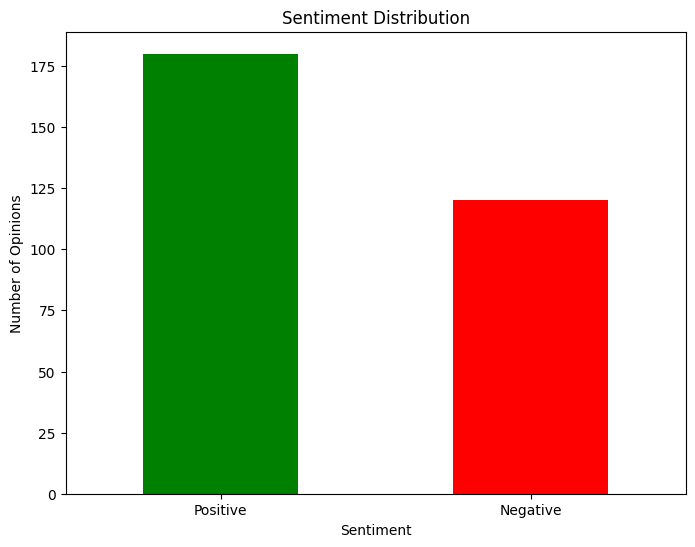

In [14]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with a 'Sentiment' column

# Count the number of opinions in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a bar chart to visualize the sentiment counts
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Opinions')
plt.xticks(rotation=0)
plt.show()

Lets plot data with non-zero positive and negative reviews by locations.

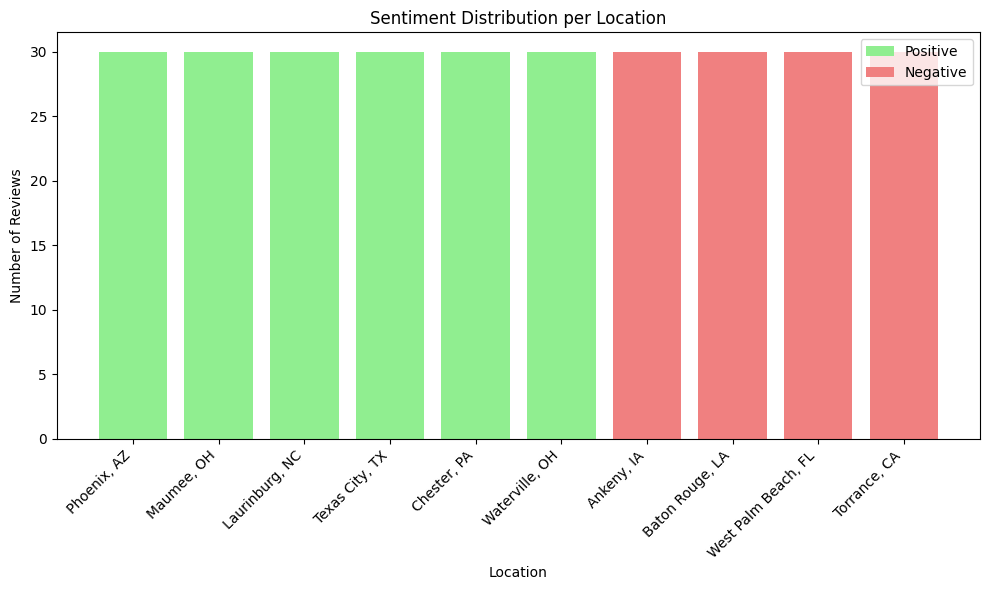

In [15]:


# Assuming 'df' is your DataFrame with 'Location' and 'Sentiment' columns

# Filter data for positive and negative sentiments
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Count positive and negative reviews per location
positive_counts = positive_reviews['location'].value_counts()
negative_counts = negative_reviews['location'].value_counts()

# Find locations with the highest positive and negative reviews
highest_positive_location = positive_counts.idxmax()
highest_negative_location = negative_counts.idxmax()

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Bar chart for positive reviews per location
plt.bar(positive_counts.index, positive_counts, color='lightgreen', label='Positive')
plt.bar(negative_counts.index, negative_counts, color='lightcoral', label='Negative')


plt.title('Sentiment Distribution per Location')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Next, We'll use NLTK for lemmatization and the Scikit-Learn library for feature selection. Additionally, we'll perform TF-IDF (Term Frequency-Inverse Document Frequency) feature extraction for the sentiment analysis on df['Review'].

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score


In [17]:
# Split data into features and labels
X = df['Review']
y = df['Sentiment']

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Feature selection using chi-squared test
k_best = SelectKBest(score_func=chi2, k=2)
X_selected = k_best.fit_transform(X_tfidf, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a simple text classification model (Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6166666666666667


An accuracy of 61% in a text classification task means that the model correctly predicted the sentiment of approximately 61% of the test data samples. In the context of sentiment analysis, this accuracy indicates that the model is moderately effective in classifying text as positive or negative based on the features and techniques used.

It's important to consider that while 61% accuracy may be better than random guessing (50% for a binary classification task), it might not be sufficient for practical applications, especially if high accuracy is required. The effectiveness of a 61% accuracy model depends on the specific goals and requirements of the project.

Some considerations:

    Balanced vs. Imbalanced Classes: If the dataset has imbalanced classes (i.e., significantly more positive or negative examples), accuracy might not be the best metric to evaluate model performance. You may want to look at other metrics like precision, recall, or F1-score.

    Feature Selection and Model Choice: The accuracy can be improved by fine-tuning feature selection techniques, using more advanced models, or exploring more sophisticated sentiment analysis approaches, such as deep learning models like LSTM or BERT-based models.

    Data Quality and Size: The quality and quantity of the training data can significantly impact model accuracy. Larger, high-quality datasets can lead to better results.

    Domain-specific Challenges: Some domains have nuances and context-specific language that require more specialized models and features to achieve higher accuracy.

In summary, while a 61% accuracy can be a starting point, you should continue to improve the model by experimenting with different techniques and approaches to achieve the desired level of accuracy for your specific sentiment analysis task.

Lets plot the confusion metrics.

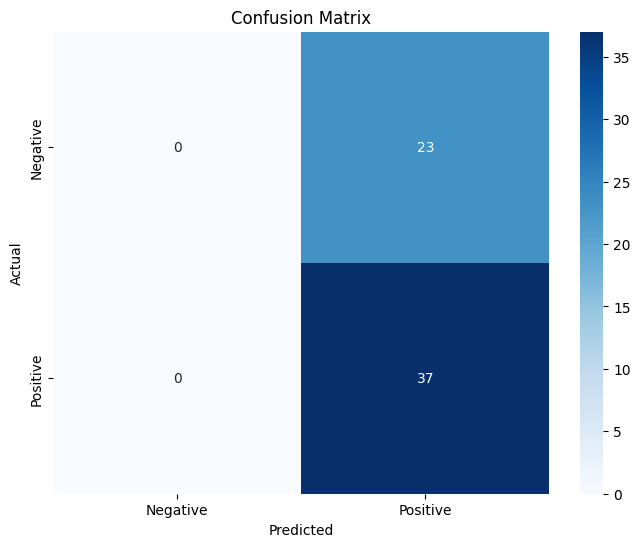

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Although we have performed Sentiment Analsyis based on TextBlob, Unsupervised methods often rely on lexicons, patterns, or statistical approaches to gauge sentiment in a text without the need for training on labeled data.

There are various unsupervised sentiment analysis approaches you can consider:

    Lexicon-Based Approaches: These approaches use sentiment lexicons or dictionaries containing words associated with positive and negative sentiment. You can calculate sentiment scores by matching words in the text with the lexicon entries and summing their scores.

    Rule-Based Approaches: Rule-based methods involve defining a set of rules or patterns that identify sentiment in text. These rules can capture sentiment-bearing phrases and expressions.

    VADER (Valence Aware Dictionary and sEntiment Reasoner): VADER is a lexicon and rule-based sentiment analysis tool that considers not only the polarity of words but also their context and intensity.

    Topic Modeling: Unsupervised topic modeling techniques like Latent Dirichlet Allocation (LDA) can be used to discover topics in text, which may indirectly reveal sentiment.

    Word Embeddings: Techniques like Word2Vec and GloVe can be used to create word embeddings, which can then be used to analyze sentiment indirectly.

Unsupervised sentiment analysis can be a useful approach when you don't have labeled data for training supervised models. However, it may not be as accurate as supervised methods, especially for complex and nuanced sentiment analysis tasks. The choice of method depends on your specific use case and the availability of labeled data.